In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression

In [50]:
df=pd.read_csv(r"C:\Users\user\Downloads\telecom.csv")

In [51]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
df.loc[ df['Churn'] == 'No', 'Churn'] = 0


In [58]:
df.loc[ df['Churn'] == 'Yes', 'Churn'] = 1


In [59]:
df['Churn']=df['Churn'].convert_dtypes()

In [60]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [61]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: Int64

In [62]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [63]:
df[['Churn','TotalCharges']].corr()

,Churn,TotalCharges
Churn,1.000000,-0.199484
TotalCharges,-0.199484,1.000000


In [74]:
lr=LinearRegression()

In [70]:
df['TotalCharges'].isnull().sum()

11

In [76]:
df.dropna(subset=['TotalCharges'],inplace=True)

In [77]:
df[['Churn','TotalCharges']].corr()

,Churn,TotalCharges
Churn,1.000000,-0.199484
TotalCharges,-0.199484,1.000000


In [83]:
x=df['Churn'].values.reshape(-1,1)

In [84]:
x.shape

(7032, 1)

In [86]:
y=df['TotalCharges'].values

In [88]:
y.shape

(7032,)

In [89]:
model=lr.fit(x,y)

In [90]:
model

LinearRegression()

In [91]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [95]:
x_train.shape

(4922, 1)

In [96]:
y_train.shape

(4922,)

In [97]:
x_test.shape

(2110, 1)

In [98]:
y_test.shape

(2110,)

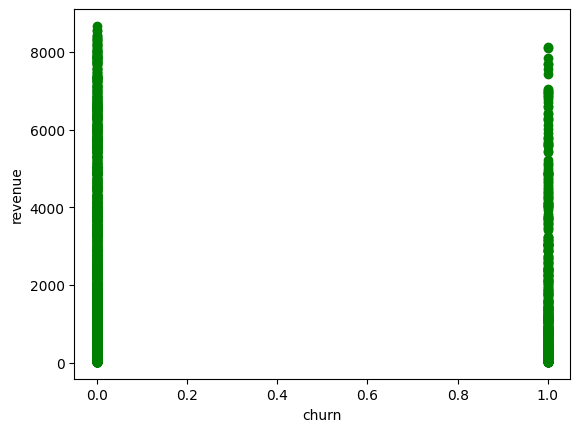

In [115]:
plt.scatter(x_test,y_test,c='green')
plt.xlabel('churn')
plt.ylabel('revenue')
plt.show()

In [100]:
y_pred=model.predict(x_test)

In [102]:
model.score(x_test,y_pred)

1.0

In [112]:
from sklearn.metrics import mean_absolute_error,accuracy_score

In [113]:
mean_absolute_error(y_test,y_pred)

1846.7270000644207

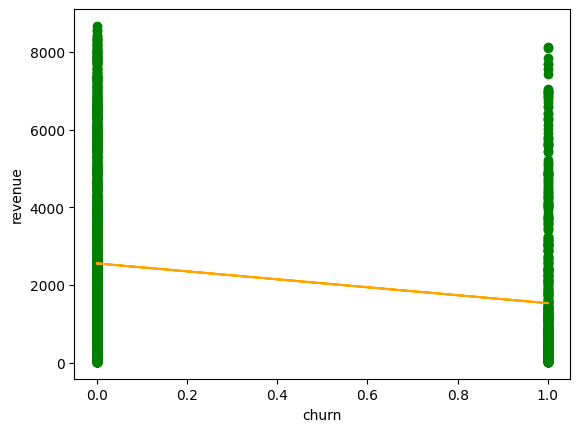

In [118]:
plt.scatter(x_test,y_test,c='green')
plt.plot(x_test,y_pred,color='orange')
plt.xlabel('churn')
plt.ylabel('revenue')
plt.show()

In [119]:
y_train_pred=model.predict(x_train)

In [120]:
model.coef_

array([-1023.54804684])

In [121]:
model.intercept_

2555.344141003298

In [122]:
model.score(x_train,y_train_pred)

1.0

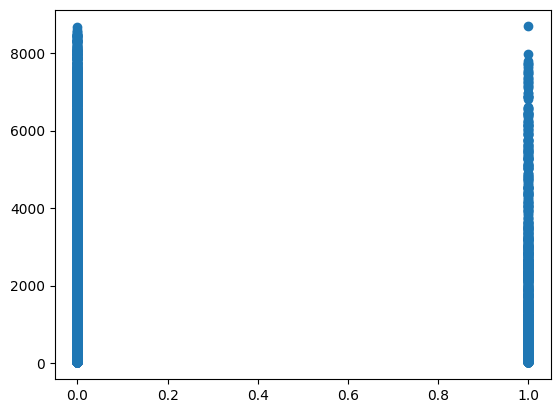

In [123]:
plt.scatter(x_train,y_train)

In [125]:
mean_absolute_error(y_train,y_train_pred)

1855.8128553224249

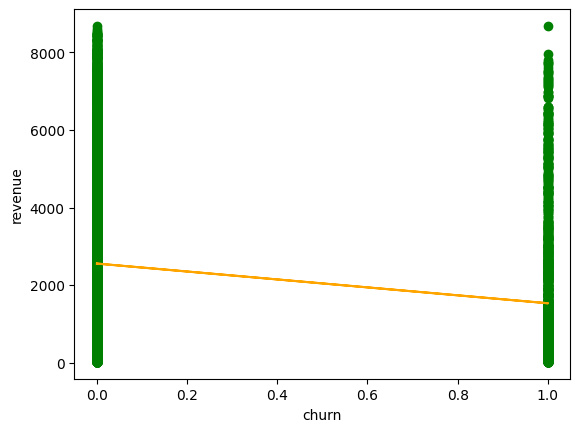

In [126]:
plt.scatter(x_train,y_train,c='green')
plt.plot(x_train,y_train_pred,color='orange')
plt.xlabel('churn')
plt.ylabel('revenue')
plt.show()